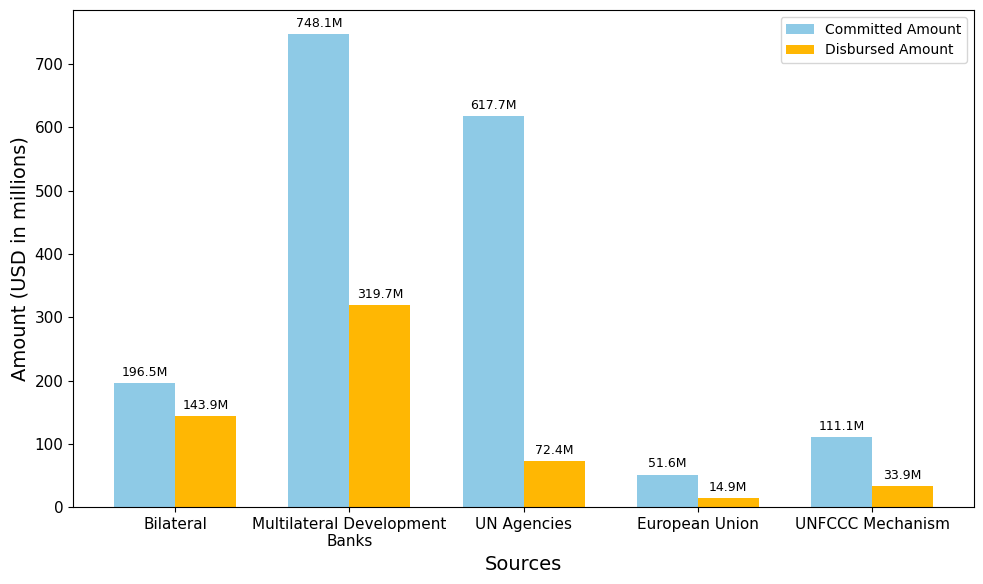

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# GLOBAL STYLE CONFIGURATION
# ---------------------------
plt.rcParams.update({
    "font.family": "DejaVu Sans",   # consistent font
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10
})

# consistent colors
COLOR_COMMITTED = "#8ecae6"
COLOR_DISBURSED = "#ffb703"

# ---------------------------
# REUSABLE FUNCTION
# ---------------------------
def plot_finance_sources(sources, committed, disbursed):
    
    x = np.arange(len(sources))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))

    bars1 = ax.bar(x - width/2, committed, width, 
                   label='Committed Amount', color=COLOR_COMMITTED)

    bars2 = ax.bar(x + width/2, disbursed, width, 
                   label='Disbursed Amount', color=COLOR_DISBURSED)

    # Labels
    ax.set_xlabel("Sources")
    ax.set_ylabel("Amount (USD in millions)")
    ax.set_xticks(x)
    ax.set_xticklabels(sources, rotation=0)
    ax.legend()

    # value labels on top of bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}M',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize = 9)

    add_labels(bars1)
    add_labels(bars2)

    plt.tight_layout()
    plt.show()


# ---------------------------
# DATA FROM YOUR IMAGE
# ---------------------------
sources = [
    "Bilateral",
    "Multilateral Development\nBanks",
    "UN Agencies",
    "European Union",
    "UNFCCC Mechanism"
]

committed = [196.5, 748.1, 617.7, 51.6, 111.1]
disbursed = [143.9, 319.7, 72.4, 14.9, 33.9]

# ---------------------------
# PLOT
# ---------------------------
plot_finance_sources(sources, committed, disbursed)


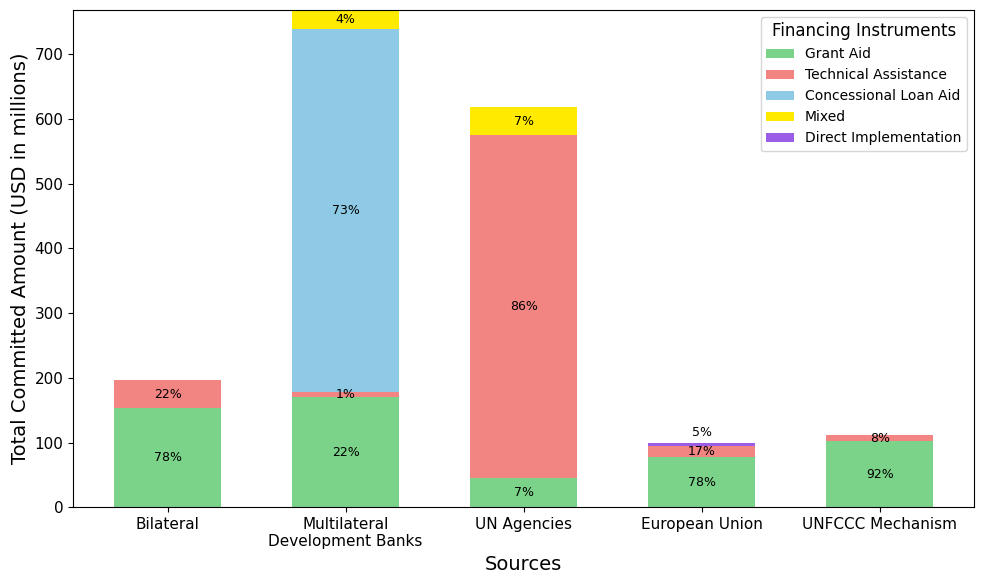

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# GLOBAL STYLE (CONSISTENT)
# ---------------------------
plt.rcParams.update({
    "font.family": "DejaVu Sans",   # consistent font
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10
})

# consistent colors for instruments
COLORS = {
    "Grant Aid": "#7bd389",
    "Technical Assistance": "#f28482",
    "Concessional Loan Aid": "#8ecae6",
    "Mixed": "#ffea00",
    "Direct Implementation": "#9b5de5"
}

VALUE_LABEL_SIZE = 9
SMALL_THRESHOLD = 6   # threshold for placing labels outside


# ---------------------------
# REUSABLE STACKED BAR FUNCTION
# ---------------------------
def plot_financing_instruments(sources, data_dict, title="Financing Instruments by Source"):
    """
    sources: list of sources (x-axis)
    data_dict: dictionary where keys = instrument names
               values = list of values for each source
    """

    x = np.arange(len(sources))
    width = 0.6

    fig, ax = plt.subplots(figsize=(10, 6))

    bottom = np.zeros(len(sources))

    # total per column (for percentage)
    totals = np.sum(list(data_dict.values()), axis=0)

    # loop through each instrument layer
    for instrument, values in data_dict.items():

        bars = ax.bar(
            x,
            values,
            width,
            bottom=bottom,
            label=instrument,
            color=COLORS[instrument]
        )

        # add percentage labels
        for i, bar in enumerate(bars):

            if values[i] <= 0:
                continue

            percent = (values[i] / totals[i]) * 100

            # SMALL SEGMENT → label above
            # SMALL SEGMENT → label above
            if values[i] < SMALL_THRESHOLD:
                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    bottom[i] + values[i] + 5,
                    f"{percent:.0f}%",   # 👈 rounded percentage
                    ha='center',
                    va='bottom',
                    fontsize=VALUE_LABEL_SIZE
                )

            # LARGE SEGMENT → label inside
            else:
                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    bottom[i] + values[i]/2,
                    f"{percent:.0f}%",   # 👈 rounded percentage
                    ha='center',
                    va='center',
                    fontsize=VALUE_LABEL_SIZE
                )


        # update stacking base
        bottom += values

    # labels & formatting
    ax.set_xlabel("Sources")
    ax.set_ylabel("Total Committed Amount (USD in millions)")
    ax.set_xticks(x)
    ax.set_xticklabels(sources)
    ax.legend(title="Financing Instruments")

    plt.tight_layout()
    plt.show()


# ---------------------------
# DATA FROM YOUR GRAPH
# ---------------------------
sources = [
    "Bilateral",
    "Multilateral\nDevelopment Banks",
    "UN Agencies",
    "European Union",
    "UNFCCC Mechanism"
]

data = {
    "Grant Aid": [153, 170, 45, 78, 102],
    "Technical Assistance": [43, 8, 530, 17, 9],
    "Concessional Loan Aid": [0, 560, 0, 0, 0],
    "Mixed": [0, 30, 43, 0, 0],
    "Direct Implementation": [0, 0, 0, 5, 0]
}


# ---------------------------
# RUN PLOT
# ---------------------------
plot_financing_instruments(sources, data)


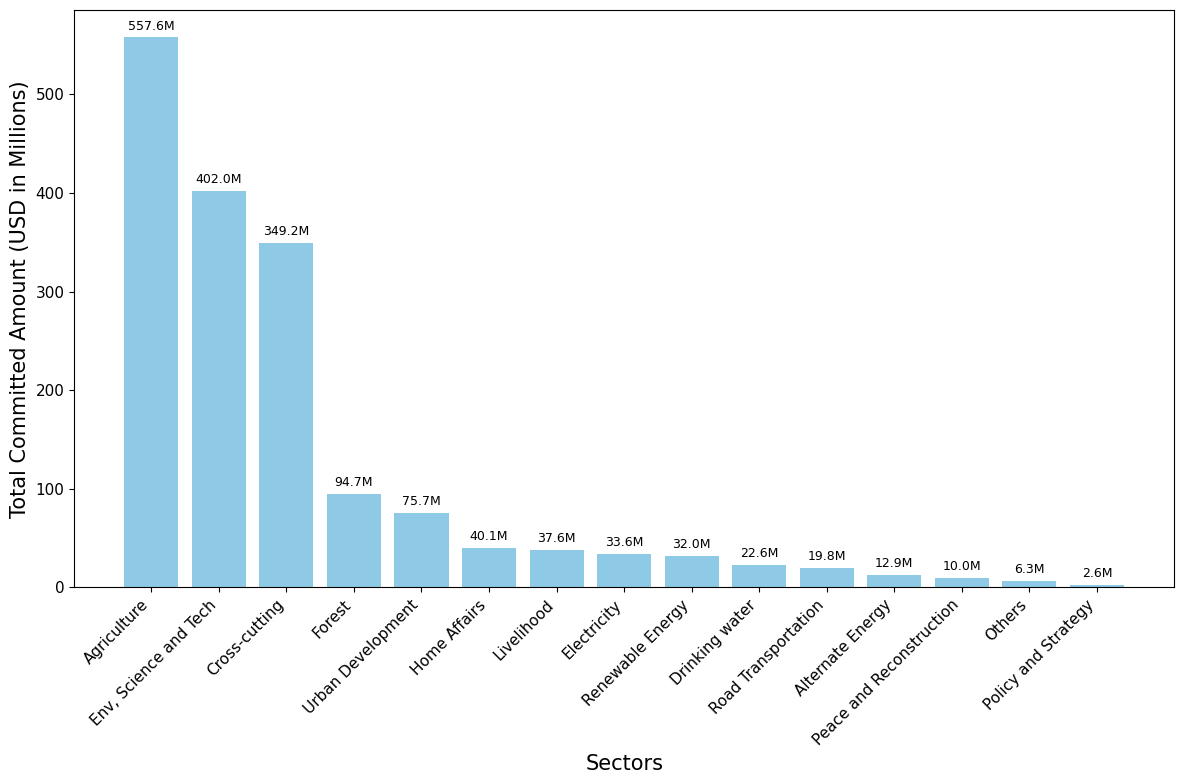

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# GLOBAL STYLE (same as your other charts)
# ---------------------------
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.labelsize": 15,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10
})

BAR_COLOR = "#8ecae6"
VALUE_LABEL_SIZE = 9


# ---------------------------
# REUSABLE FUNCTION
# ---------------------------
def plot_sector_funding(sectors, values):
    
    x = np.arange(len(sectors))

    fig, ax = plt.subplots(figsize=(12, 8))

    bars = ax.bar(x, values, color=BAR_COLOR)

    # axis labels
    ax.set_xlabel("Sectors")
    ax.set_ylabel("Total Committed Amount (USD in Millions)")

    # 🔥 slanted labels
    ax.set_xticks(x)
    ax.set_xticklabels(sectors, rotation=45, ha='right')

    # value labels on top
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 5,
            f"{height:.1f}M",
            ha='center',
            va='bottom',
            fontsize=VALUE_LABEL_SIZE
        )

    plt.tight_layout()
    plt.show()


# ---------------------------
# DATA FROM YOUR GRAPH
# ---------------------------
sectors = [
    "Agriculture",
    "Env, Science and Tech",
    "Cross-cutting",
    "Forest",
    "Urban Development",
    "Home Affairs",
    "Livelihood",
    "Electricity",
    "Renewable Energy",
    "Drinking water",
    "Road Transportation",
    "Alternate Energy",
    "Peace and Reconstruction",
    "Others",
    "Policy and Strategy"
]

values = [
    557.6, 402.0, 349.2, 94.7, 75.7,
    40.1, 37.6, 33.6, 32.0, 22.6,
    19.8, 12.9, 10.0, 6.3, 2.6
]

# ---------------------------
# PLOT
# ---------------------------
plot_sector_funding(sectors, values)


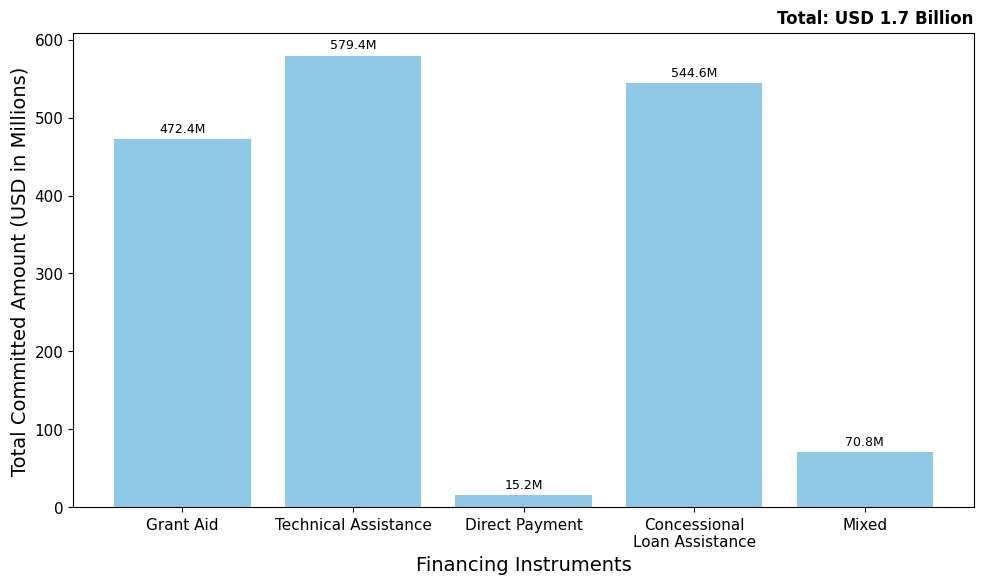

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# GLOBAL STYLE (same as others)
# ---------------------------
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10
})

BAR_COLOR = "#8ecae6"
VALUE_LABEL_SIZE = 9


# ---------------------------
# REUSABLE FUNCTION
# ---------------------------
def plot_instrument_totals(labels, values):

    x = np.arange(len(labels))
    total = sum(values)

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.bar(x, values, color=BAR_COLOR)

    # axis labels
    ax.set_xlabel("Financing Instruments")
    ax.set_ylabel("Total Committed Amount (USD in Millions)")

    # x ticks
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    # value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 5,
            f"{height:.1f}M",
            ha='center',
            va='bottom',
            fontsize=VALUE_LABEL_SIZE
        )

    # 🔥 total annotation (top-right)
    ax.text(
        0.999, 1.05,
        f"Total: USD {total/1000:.1f} Billion",
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=12,
        fontweight='bold'
    )

    plt.tight_layout()
    plt.show()


# ---------------------------
# DATA FROM YOUR GRAPH
# ---------------------------
labels = [
    "Grant Aid",
    "Technical Assistance",
    "Direct Payment",
    "Concessional\nLoan Assistance",
    "Mixed"
]

values = [472.4, 579.4, 15.2, 544.6, 70.8]


# ---------------------------
# PLOT
# ---------------------------
plot_instrument_totals(labels, values)
